In [1]:
include("../EuclidElements.jl");

# Book 1

## Proposition 1

On a given finite straight line, to construct an equilateral triangle...



### I.1 Easy unit

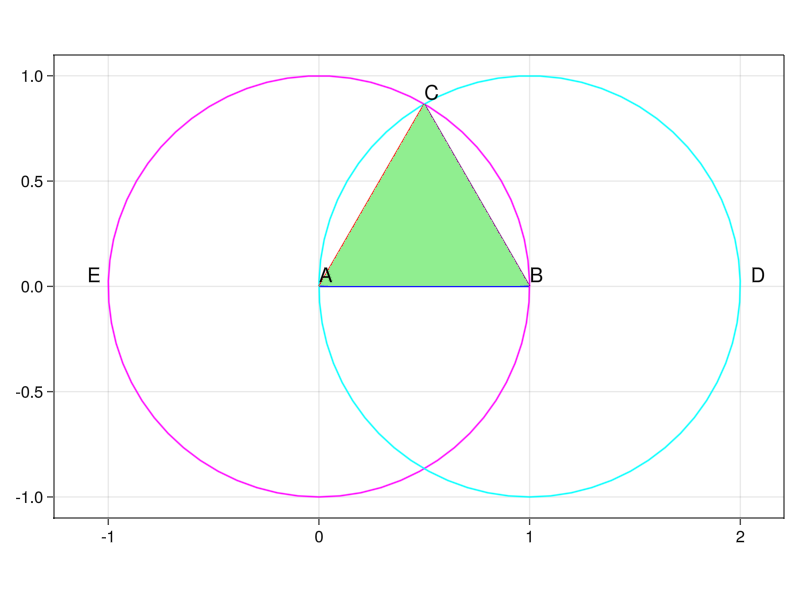

In [2]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect())

#Define & draw points A and B to bound line AB
A = Point2f(0,0)
B = Point2f(1,0)

#Draw a horizontal unit line, AB to get started on
AB = lines!([A, B], color=:blue)

#Draw circle BCD with center at A and radius of length AB
BCD = lines!(Circle(A, distance(A,B)), color=:magenta)
#also draw point D

#Draw circle ACE with center at B and radius of length AB
ACE = lines!(Circle(B, distance(A,B)), color=:cyan)
#also draw point E

# Get C
# this is unit circle 60° because equilateral triangles have 3 60° angles
#   Euclid eye-balled this, but that's okay, the math checks
C = Point2f(1/2, (√3)/2)

#Draw AC and BC to make the equilateral triangle!
AC = lines!([A, C], color=:red)
BC = lines!([B, C], color=:purple)

#And fill the triange to highlight it! :D
poly!([A, C, B], color=:lightgreen)

#Draw the points so everything is well defined
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(2.05, 0, text="D")
Epoint = text!(-1.1, 0, text="E")

#Draw and show the chart :)
current_figure()

### I.1 Rotated and difficult

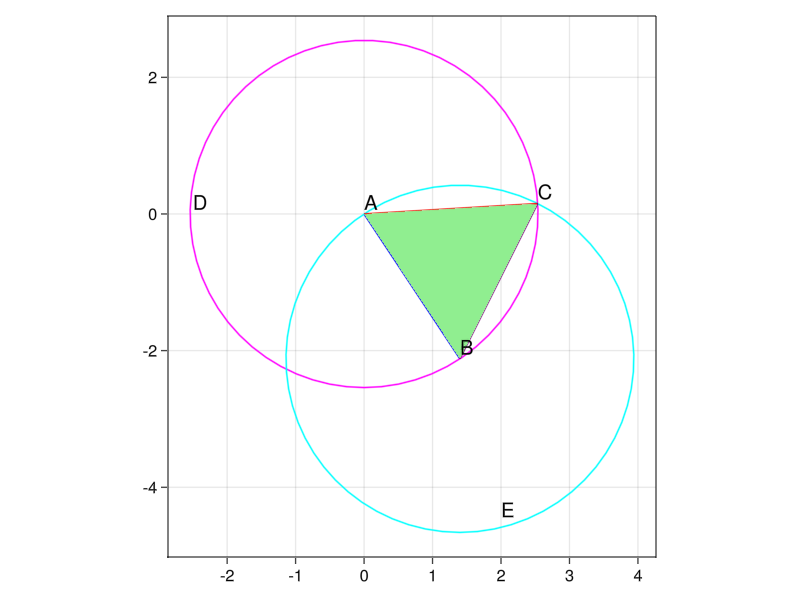

In [3]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect())

#Define points A and B to bound line AB
#A = Point2f(0,0)
#B = Point2f(1,2)
A = Point2f(0,0)
B = Point2f(1.4, -2.12)

#Draw line AB to get started on
AB = lines!([A, B], color=:blue)

# Get the radius r, which is the distance of AB
r = distance(A,B)

#Draw circle BCD with center at A and radius of length AB
BCD = lines!(Circle(A, r), color=:magenta)

#Draw circle ACE with center at B and radius of length AB
ACE = lines!(Circle(B, r), color=:cyan)

# Get the rotation
if B[1] == A[1]
    θ = B[1] > A[1] ? 3π/2 : π/2
else
    θ = acos(((B[1]-A[1])^2 + r^2 - (B[2]-A[2])^2) / (2*(B[1]-A[1])*r))
end
if B[2] < A[2]
    θ = -θ
end

# Get C
# this is unit circle 60° * r because equilateral triangles have 3 60° angles
#   just apply a matrix rotation on that [x,y]*r  w/ [x,y] from the unit circle 60°
C_x, C_y = [cos(θ) -sin(θ); sin(θ) cos(θ)]*[ r/2, (r*√3)/2 ]
# Note: Could calculate points of intersection; because equilateral = 3 60° angles, it's the same math, tho
C = Point2f(C_x, C_y)

#Draw AC and BC to make the equilateral triangle!
AC = lines!([A, C], color=:red)
BC = lines!([B, C], color=:purple)

#And fill the triange to highlight it! :D
poly!([A, C, B], color=:lightgreen)

#Draw the points so everything is well defined
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(-2.5, 0, text="D")
Epoint = text!(2, -4.5, text="E")

#Draw and show the chart :)
current_figure()

### Function

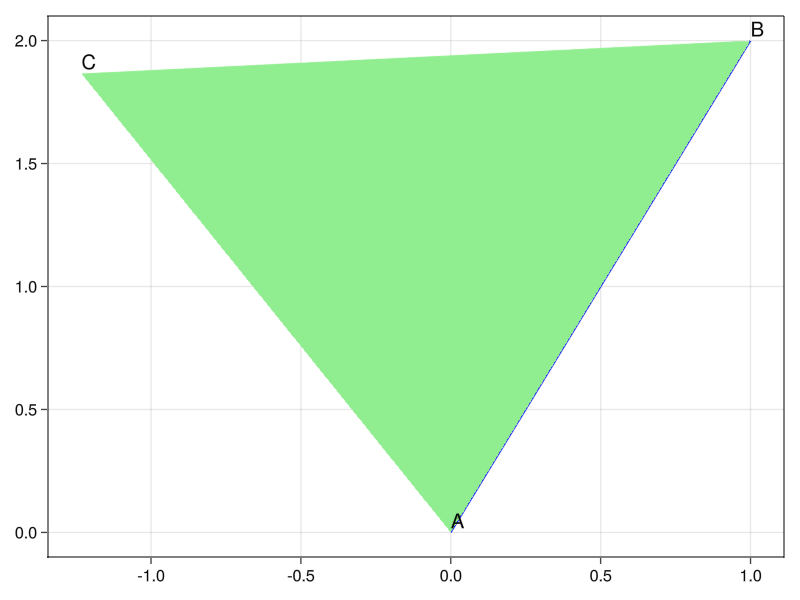

In [4]:
# Find the third point that constructs an equilateral triangle from 2 points
function equilateral_from(A::Point2, B::Point2)
    r = distance(A, B)
    if B[1] == A[1]
        θ = B[1] > A[1] ? 3π/2 : π/2
    else
        θ = acos(((B[1]-A[1])^2 + r^2 - (B[2]-A[2])^2) / (2*(B[1]-A[1])*r))
    end
    if B[2] < A[2]
        θ = -θ
    end
    x, y = [cos(θ) -sin(θ); sin(θ) cos(θ)]*[ r/2, (r*√3)/2 ] + A
    Point2(x, y)
end;

#Define points A and B to bound line AB
A = Point2f(0,0)
B = Point2f(1,2)

# Get the equilateral
C = equilateral_from(A, B)

#setup the chart space...
f = Figure()
ax = Axis(f[1,1])

#Draw line AB to get started on
AB = lines!([A, B], color=:blue)

#And fill the triange to highlight it! :D
poly!([A, C, B], color=:lightgreen)

#if want to draw circles...
#BCD = lines!(Circle(A, r), color=:magenta)
#ACE = lines!(Circle(B, r), color=:cyan)

#Draw the points so everything is well defined
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")

#Draw and show the chart :)
current_figure()

### ANIMATION

In [5]:
#Define points A and B to bound line AB
A = Observable(Point2f(0,0))
B_0 = Point2f(1.4, -2.12)
B = Observable(B_0)

orig_r = distance(A[],B[])
r = @lift(distance($A, $B))

D = @lift(continue_line($B, $A, $r))
E = @lift(continue_line($A, $B, $r))

# Get the equilateral
C = @lift(equilateral_from($A, $B))

#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect())
xlims!(ax, -7,8)
ylims!(ax, -7,7)

#Draw line AB to get started on
AB = lines!(@lift([$A,$B]), color=:blue)

#And fill the triange to highlight it! :D
ACB = poly!(@lift([$A, $C, $B]), color=:lightgreen)

#if want to draw circles...
BCD = lines!(@lift(Circle($A, $r)), color=:magenta)
ACE = lines!(@lift(Circle($B, $r)), color=:cyan)

#Draw the points so everything is well defined
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E")

# Draw the animation!
framerate = 24
d_s = 6
timestamps = range(0,2π, step=2π/(d_s*framerate))

record(f, "Euclid-I-1.gif", timestamps; framerate=framerate) do t
    calc_new_B = [cos(t) -sin(t); sin(t) cos(t)]*B_0
    new_B = Point2f(calc_new_B[1], calc_new_B[2])
    sup_B = continue_line(A[], new_B, sin(t))
    B[] = sup_B
end;

![](Euclid-I-1.gif)